In [4]:
from sklearn.datasets import make_classification
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=2, random_state=42)

Text(0.5, 1.0, '2D Classification')

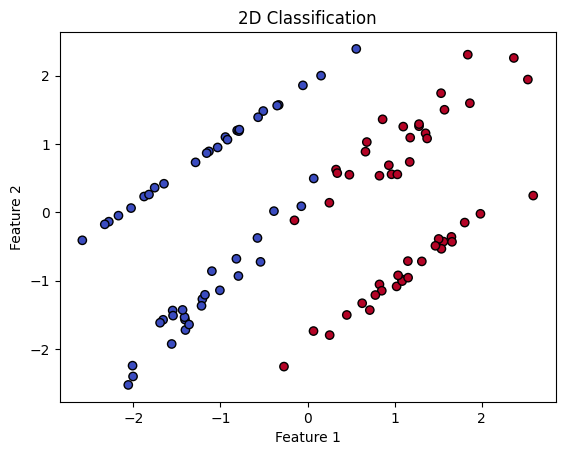

In [3]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', edgecolors='k')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("2D Classification")

In [6]:
def euclidean_distance(point1, point2):
    squared_diff = 0
    for i in range(len(point1)):
        squared_diff += (point1[i]-point2[i])**2
    return squared_diff


In [7]:
print(euclidean_distance([1, 2], [4, 6]))

25


In [8]:
def k_nearest_neighbours(X_train, y_train, test_point, k):
    distance = []

    for i in range(len(X_train)):
        dist = euclidean_distance(test_point, X_train[i])
        distance.append((dist, y_train[i]))

    distance.sort(key=lambda x: x[0])

    neighbours = []
    for i in range(k):
        neighbours.append(distance[i][1])

    return neighbours


In [9]:
def predict(X_train, y_train, test_point, k):
    neighbours = k_nearest_neighbours(X_train, y_train, test_point, k)

    count_0 = 0
    count_1 = 1
    for label in neighbours:
        if label==0:
            count_0+=1
        elif label==1:
            count_1+=1

    if count_0>count_1:
        return 0
    else:
        return 1

In [10]:
test_point = X[0]
predicted_label = predict(X, y, test_point, 5)
print("Predicted Label: ", predicted_label)
print("Actual Value: ", y[0])

Predicted Label:  1
Actual Value:  0


In [11]:
def get_accuracy(X_test, y_test, X_train, y_train, k):
    correct = 0
    total = len(X_test)

    for i in range(total):
        predicted = predict(X_train, y_train, X_test[i], k)
        actual = y_test[i]
    
        if predicted == actual:
            correct+=1
    
    accuracy = correct/total
    return accuracy

In [12]:
accuracy = get_accuracy(X, y, X, y, 5)
print("Accuracy is: ", accuracy)

Accuracy is:  0.96


In [13]:
accuracy = get_accuracy(X, y, X, y, 3)
print("Accuracy with k=3: ", accuracy)

Accuracy with k=3:  0.97
